In [6]:
import yfinance as yf
import pandas as pd

# Ensure yfinance is installed
try:
    # Create a ticker object for Tesla
    tsla = yf.Ticker("TSLA")

    # Extract historical market data
    tesla_data = tsla.history(period="max")

    # Check if data is retrieved
    if tesla_data.empty:
        print("No data retrieved. Please check the ticker symbol or internet connection.")
    else:
        # Reset the index
        tesla_data.reset_index(inplace=True)

        # Save to a CSV file (optional)
        tesla_data.to_csv("tesla_stock_data.csv", index=False)

        # Display the first five rows
        print(tesla_data.head())

except Exception as e:
    print(f"An error occurred: {e}")



                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 119.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 164.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 175.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=14e495e4bbdf6c0ee433a00bb33bfeeb949b79ae0a80292e416199c79ac8c06a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [7]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's financials on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract the revenue table
tables = soup.find_all("table")
for table in tables:
    if "Tesla Annual Revenue" in table.text:
        revenue_table = table
        break

# Extract table rows
rows = revenue_table.find_all("tr")[1:]  # Skip the header

# Store the extracted data
tesla_revenue = []
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure we only get Year and Revenue columns
        year = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue.append([year, revenue])

# Convert to DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Year", "Revenue"])

# Display the last five rows
print(tesla_revenue_df.tail())


NameError: name 'revenue_table' is not defined

In [9]:
pip install yahoo_fin


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... one
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 140.2 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6089 sha256=940c98c10af432b73a5df26860ae775b2b2fd97ea53d7a91b33dc37de38d1323
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
  Created wheel for websockets: filename=websockets-10.4-cp312-cp312-linux_x86_64.whl size=98642 sha256=6b2f9b01b4f595321f1053a13eae42d4e030286ca2905d1701efe359b790f6b6
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/80/cf/6d/5d7e4c920cb41925a178b2d2621889c520d648bab487b1d7fd
Successfully built sgmllib3k websockets
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
from yahoo_fin import stock_info as si
import pandas as pd

# Get Tesla income statement
income_statement = si.get_income_statement("TSLA")

# Transpose to get proper column orientation
tesla_revenue_df = income_statement.T

# Select only the Revenue row
tesla_revenue_df = tesla_revenue_df[['total_revenue']].reset_index()
tesla_revenue_df.columns = ['Year', 'Revenue']

# Display the last five rows
print(tesla_revenue_df.tail())


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


IndexError: list index out of range

In [11]:
pip install requests_html

Note: you may need to restart the kernel to use updated packages.


In [12]:
from yahoo_fin import stock_info as si
import pandas as pd

# Get Tesla income statement
income_statement = si.get_income_statement("TSLA")

# Transpose to get proper column orientation
tesla_revenue_df = income_statement.T

# Select only the Revenue row
tesla_revenue_df = tesla_revenue_df[['total_revenue']].reset_index()
tesla_revenue_df.columns = ['Year', 'Revenue']

# Display the last five rows
print(tesla_revenue_df.tail())


IndexError: list index out of range

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's revenue data on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract the revenue table
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "Tesla Annual Revenue" in table.text:
        revenue_table = table
        break

# Ensure the table is found
if revenue_table:
    rows = revenue_table.find_all("tr")[1:]  # Skip the header
    
    # Store the extracted data
    tesla_revenue = []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:  # Ensure we only get Year and Revenue columns
            year = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue.append([year, revenue])

    # Convert to DataFrame
    tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Year", "Revenue"])
    
    # Display the last five rows
    print(tesla_revenue_df.tail())
else:
    print("Revenue table not found. The website structure might have changed.")


Revenue table not found. The website structure might have changed.


In [14]:
pip install pandas requests beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL (example: Yahoo Finance)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fetch the webpage
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the revenue table
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Extract data from the table
rows = revenue_table.find_all("tr")
data = []
for row in rows[1:]:  # Skip header
    cols = row.find_all("td")
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Create DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display last five rows
print(tesla_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Set up Selenium WebDriver (Make sure you have ChromeDriver installed)
driver = webdriver.Chrome()

# Open the webpage
driver.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")
time.sleep(5)  # Wait for JavaScript to load the content

# Locate the revenue table
table = driver.find_element(By.CLASS_NAME, "historical_data_table")
rows = table.find_elements(By.TAG_NAME, "tr")

# Extract data
data = []
for row in rows[1:]:  # Skip header
    cols = row.find_elements(By.TAG_NAME, "td")
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Convert to DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display last five rows
print(tesla_revenue.tail())

# Close the browser
driver.quit()

# Save to CSV
tesla_revenue.to_csv("tesla_revenue.csv", index=False)

In [19]:
pip install selenium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 107.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Extract GameStop (GME) Stock Data using yfinance

import yfinance as yf
import pandas as pd

# Download GameStop (GME) stock data
gme_data = yf.download("GME", start="2020-01-01", end="2024-12-31")

# Reset the index
gme_data.reset_index(inplace=True)

# Save to CSV
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display first five rows
print(gme_data.head())


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


In [22]:
pip install requests pandas beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [24]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Fetch webpage content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the correct table by its class
tables = soup.find_all("table", {"class": "historical_data_table"})

# Check if tables were found
if len(tables) == 0:
    raise ValueError("No revenue table found. The webpage structure might have changed.")

# Extract the first revenue table
gme_table = tables[0]

# Extract data from the table
data = []
rows = gme_table.find_all("tr")
for row in rows[1:]:  # Skip header row
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:
        data.append(cols)

# Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Year", "Revenue"])

# Display the last five rows
print(gme_revenue.tail(5))


ValueError: No revenue table found. The webpage structure might have changed.

In [25]:
pip install pandas yfinance matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 110.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


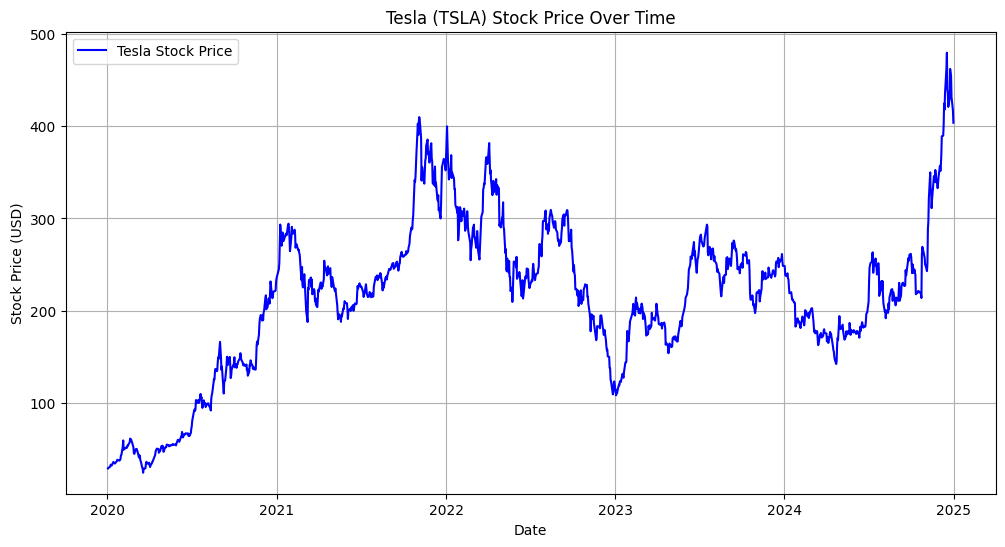

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla = yf.download('TSLA', start='2020-01-01', end='2025-01-01')

# Function to make graph
def make_graph(data, title="Stock Price Graph"):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label="Tesla Stock Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Tesla stock data
make_graph(tesla, title="Tesla (TSLA) Stock Price Over Time")


[*********************100%***********************]  1 of 1 completed


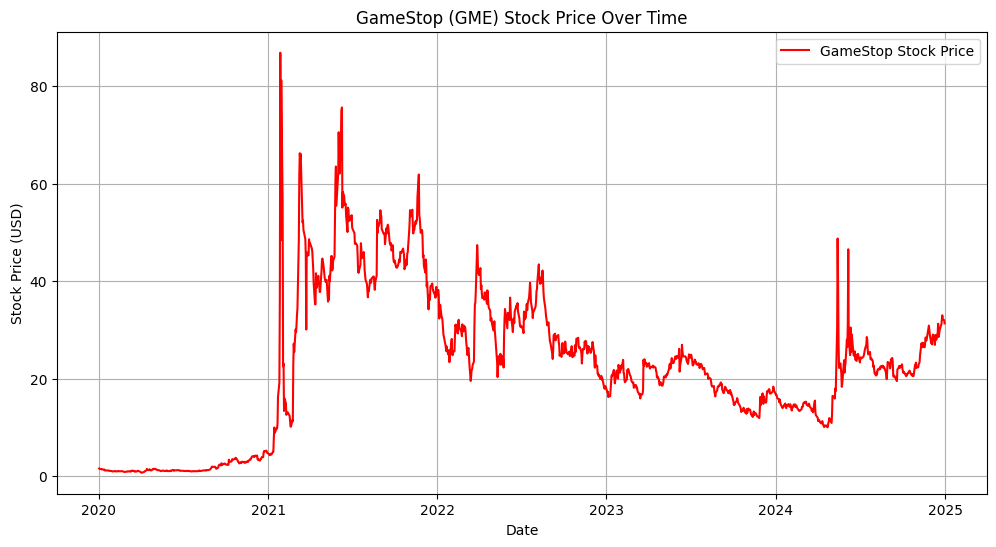

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data
gme = yf.download('GME', start='2020-01-01', end='2025-01-01')

# Function to make graph
def make_graph(data, title="Stock Price Graph"):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label="GameStop Stock Price", color='red')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot GameStop stock data
make_graph(gme, title="GameStop (GME) Stock Price Over Time")
